<a href="https://colab.research.google.com/github/IagoAntunes/Python__learning/blob/master/ProjetoAlbumFigurinhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
n_album = 212
preco_pacote = 4
cromos_por_pacote = 4
preco_album = 10



In [ ]:
def SimulaAlbum():
    album=np.zeros(n_album)
    pacotes = 0
    while True:
      pacotinho = np.random.choice(np.arange(0,n_album) , size = 4)
      pacotes += 1
      for i in [0, 1, 2 ,3]:
        album[pacotinho[i]] += 1
      if np.all(album >= 1):
        break;

    custo = pacotes*preco_pacote + preco_album
    return custo


In [ ]:
S = 1000
resultados = []

for i in range(S):
  pessoa = SimulaAlbum()
  resultados.append(pessoa)


sim = np.array(resultados)

In [ ]:
sim

array([1310, 1130, 1458, 1658, 1158, 1050, 1194, 1210,  938, 1326, 1134,
       1342, 1270, 1086, 1238, 1394, 1774, 1762, 1210, 1270, 1082, 1670,
       1338, 1086, 1374, 1454, 1190, 1286, 1246, 1722, 1478, 1410, 1470,
        990, 1402, 1174, 1130, 1442, 1230, 1010, 1382,  942, 1146,  914,
       1154, 1126, 1054, 1118,  838, 1202,  938, 1194, 1266, 1198, 1446,
       1266, 1018, 1126, 1062, 1022, 1366, 1018,  970, 1210, 1186, 1246,
       1194, 1470, 1158, 1094, 1406, 1098, 1210, 1178, 1538, 1022, 1194,
       1346, 1506, 1018, 1318, 1254, 1134, 1142, 1038, 1294,  874, 1138,
       1090, 1142, 1722,  910,  946, 1246, 1030, 1454,  910, 1618, 1322,
       1390, 1314,  942, 1330, 1250, 1382,  926, 1142, 1566, 1086, 1066,
       1046, 1698, 1106, 1846,  886, 1058, 1298, 1402, 1030, 1754, 1062,
       1402, 1438, 1214, 1046, 1378, 1754, 1566, 1014, 1330, 1714, 1202,
       1054,  842, 1026, 1138, 1594, 1114, 1506, 1282, 1422, 1210, 1342,
       1026, 1022, 1650, 1050, 1402, 1070, 1398, 15

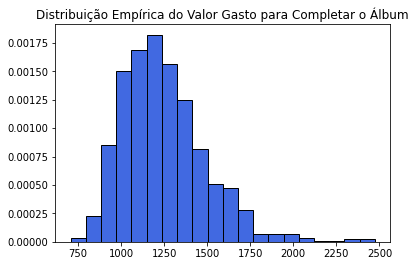

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sim, bins = 20, density = True, color = 'royalblue', edgecolor = 'black')
plt.title('Distribuição Empírica do Valor Gasto para Completar o Álbum')
plt.show()

In [ ]:
# questoes 4 e 5
 
prob1 = sum(np.array(sim) < 1500)/S
prob2 = sum(np.array(sim) > np.array(sim).mean())/S
 
print('A probabilidade de se gastar menos de 1500 é {:.2f}%'.format(prob1*100))
print('A probabilidade de se gastar mais do que a média é {:.2f}%'.format(prob2*100))

A probabilidade de se gastar menos de 1500 é 86.10%
A probabilidade de se gastar mais do que a média é 43.40%


In [107]:
# questao 6

qts = np.quantile(sim, [0.025, 0.975])
print('O intervalo de confiança de 95% para o gasto total é ({:.2f}, {:.2f})'.format(qts[0], qts[1]))

O intervalo de confiança de 95% para o gasto total é (889.90, 1802.70)


In [123]:
# comprando figurinhas até completar o álbum
def SimulaAlbum(qtde_albuns = 1):
    album = np.zeros(n_album) 
    pacotes = 0
    while not np.all(album >= qtde_albuns):
        pacotinho = np.random.choice(range(n_album), 4)
        pacotes += 1

        for i in pacotinho:
            album[i] += 1
 

    valor_gasto = qtde_albuns*preco_album + preco_pacote * pacotes 
    valor_gasto_por_album = valor_gasto/qtde_albuns

    return valor_gasto, pacotes, valor_gasto_por_album

SimulaAlbum(2)

(1880, 465, 940.0)

In [124]:
def Simulacao(qtde_albuns, simulacoes = 1000, silencio = False):
    valores = []
    for i in range(simulacoes):
        valores.append(SimulaAlbum(qtde_albuns)[2])
        if not silencio:
            if (i+1) % 100 == 0:
                print('Simulação: ', i+1, '/', simulacoes)
    return valores

sim = Simulacao(qtde_albuns = 2, simulacoes = 100)

Simulação:  100 / 100


In [125]:
# questões 7 e 8

sim2 = Simulacao(2, 100, silencio = True) 
c2 = np.array(sim2).mean() 

sim3 = Simulacao(3, 100, silencio = True) 
c3 = np.array(sim3).mean()  

print('Custo médio entre 2 amigos:', round(c2, 2) )
print('Custo médio entre 3 amigos:', round(c3, 2) )

Custo médio entre 2 amigos: 885.18
Custo médio entre 3 amigos: 718.63


In [127]:
import time
def SimulacaoAmigos(amigos = 40, simulacoes = 10):
    medias = []
    amigos = list(range(1, amigos + 1, 1))
    for i in amigos: 
        t = time.time()
        aux = Simulacao(i, simulacoes, silencio = True)
        tempo = round(time.time() - t, 2)
        print('Tempo total de {}s para a simulação com {} amigo(s)'.format(tempo, i))
        medias.append(np.array(aux).mean())
    return amigos, medias

sim_amigos = SimulacaoAmigos(amigos = 10, simulacoes = 5)

Tempo total de 0.1s para a simulação com 1 amigo(s)
Tempo total de 0.15s para a simulação com 2 amigo(s)
Tempo total de 0.21s para a simulação com 3 amigo(s)
Tempo total de 0.36s para a simulação com 4 amigo(s)
Tempo total de 0.33s para a simulação com 5 amigo(s)
Tempo total de 0.33s para a simulação com 6 amigo(s)
Tempo total de 0.57s para a simulação com 7 amigo(s)
Tempo total de 0.44s para a simulação com 8 amigo(s)
Tempo total de 0.54s para a simulação com 9 amigo(s)
Tempo total de 0.49s para a simulação com 10 amigo(s)


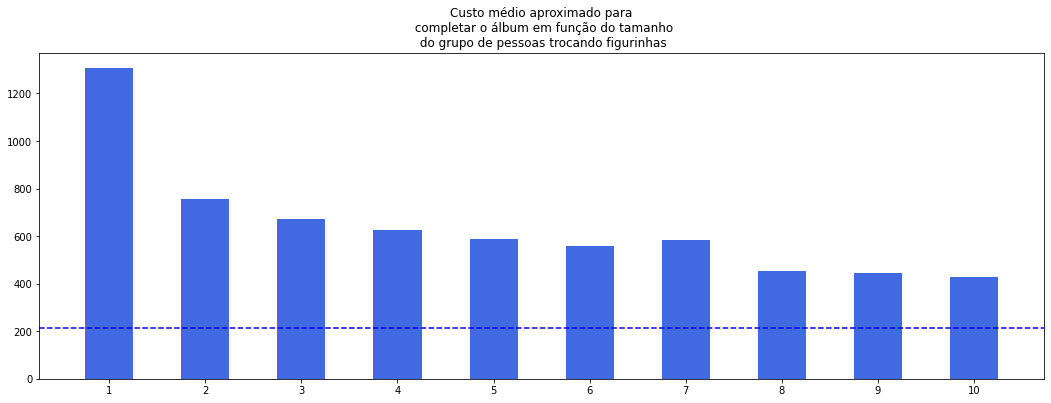

In [129]:
import math

def GraficoCustoAmigos(simulacao):

    minimo_possivel = math.ceil(n_album/cromos_por_pacote)*preco_pacote 

    plt.figure(figsize=(18, 6))
    plt.bar(simulacao[0], simulacao[1], width = 0.5, color = 'royalblue')
    plt.xticks(simulacao[0])
    plt.axhline(y = minimo_possivel, linestyle = 'dashed', color = 'blue')
    plt.title('Custo médio aproximado para\n completar o álbum em função do tamanho\n do grupo de pessoas trocando figurinhas')
    plt.show()

GraficoCustoAmigos(sim_amigos)